In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

load, save then manually change the coordinates, ONLY RUN ONCE!

In [3]:
v1 = ert.load(dir + '10Aug/p02_v1_ws.dat')
#h1 = ert.load(dir + '11Aug/p02_h1_ws.dat')
#h1w = ert.load(dir + '11Aug/p02_h1w_ws_hd.dat')
#h1e = ert.load(dir + '11Aug/p02_h1e_ws_hd.dat')
#camp1 = ert.load(dir + '12Aug/p02_camp_along_shore_ws.dat')
#camp2 = ert.load(dir + '12Aug/p02_camp_perp_shore_ws.dat')
#camp3 = ert.load(dir + '12Aug/p02_camp_perp_pit_ws.dat')

v1.save(dir+"10Aug/p02_v1_ws.txt", "a b m n err rhoa")
#h1.save(dir + '11Aug/p02_h1_ws.txt', "a b m n err rhoa")
#h1w.save(dir + '11Aug/p02_h1w_ws_hd.txt', "a b m n err rhoa")
#h1e.save(dir + '11Aug/p02_h1e_ws_hd.txt', "a b m n err rhoa")
#camp1.save(dir + '12Aug/p02_camp_along_shore_ws.txt', "a b m n err rhoa")
#camp2.save(dir + '12Aug/p02_camp_perp_shore_ws.txt', "a b m n err rhoa")
#camp3.save(dir + '12Aug/p02_camp_perp_pit_ws.txt', "a b m n err rhoa")

16/09/24 - 08:57:30 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [190]:
v1 = ert.load(dir + '10Aug/p02_v1_ws.txt')
h1 = ert.load(dir + '11Aug/p02_h1_ws.txt')
h1w = ert.load(dir + '11Aug/p02_h1w_ws_hd.txt') #topo of ele 7 missing, extrapolated
h1e = ert.load(dir + '11Aug/p02_h1e_ws_hd.txt')
#camp1 = ert.load(dir + '12Aug/p02_camp_along_shore_ws.txt')
#camp2 = ert.load(dir + '12Aug/p02_camp_perp_shore_ws.txt')
#camp3 = ert.load(dir + '12Aug/p02_camp_perp_pit_ws.txt')
parsons = [v1, h1, h1w, h1e]
#print(h1)
#ert.showData(h1)

In [191]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(pg.z(data), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    ert.show(data, data['err']*100)


    return data, mgr, k0


17/09/24 - 08:34:30 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.2s x 9): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5920828195307936865
17/09/24 - 08:34:30 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 9): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2471788095472722595
17/09/24 - 08:34:31 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.1s x 9): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5027893933902688870
17/09/24 - 08:34:31 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 9): C:\Users\mealiy001\AppData\Roaming\py

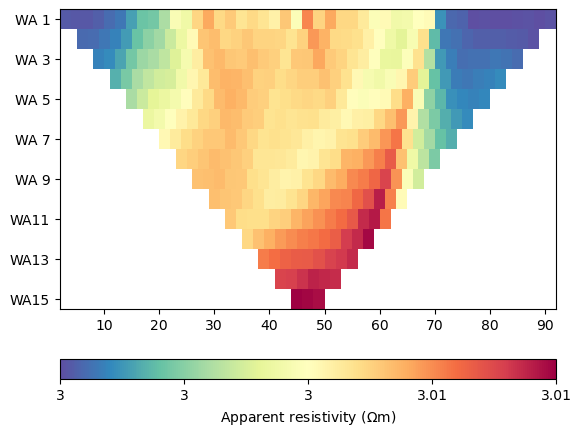

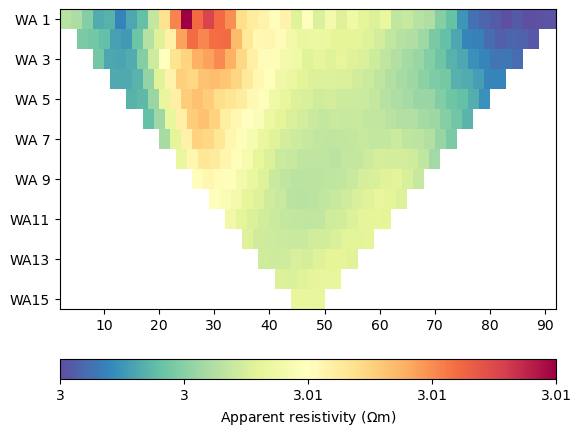

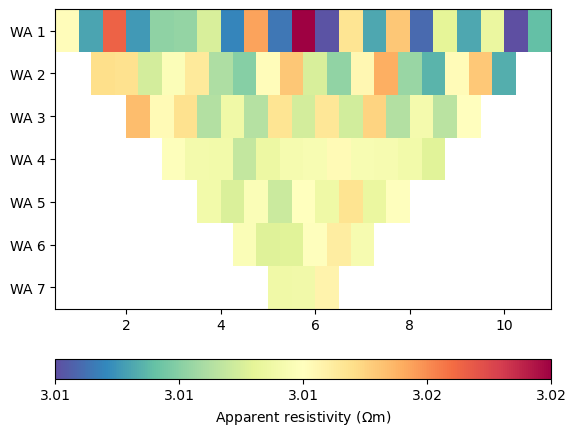

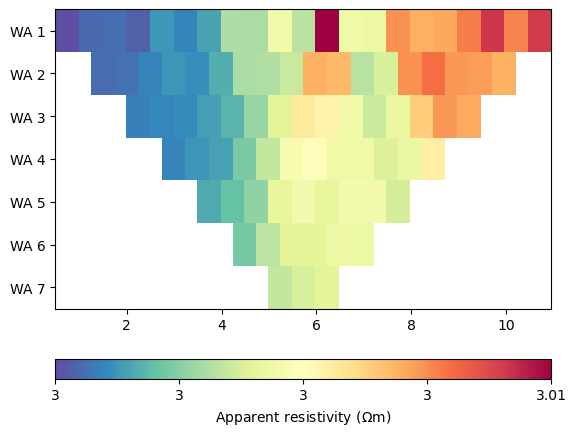

In [192]:

for item in parsons:
 geom_error(item)

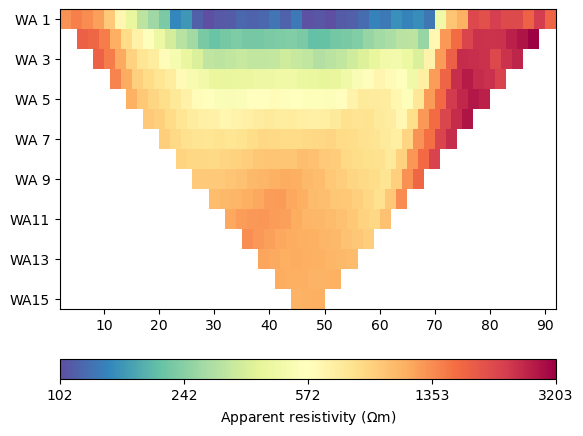

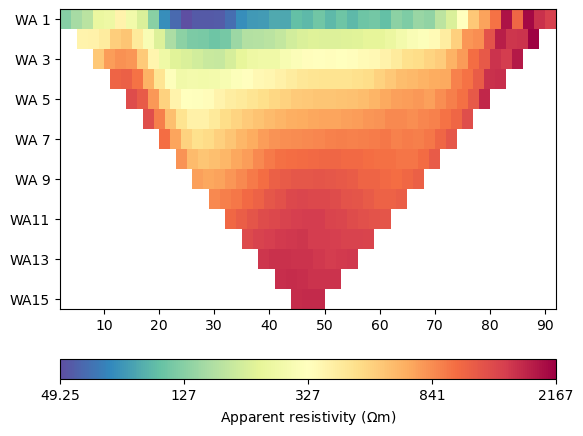

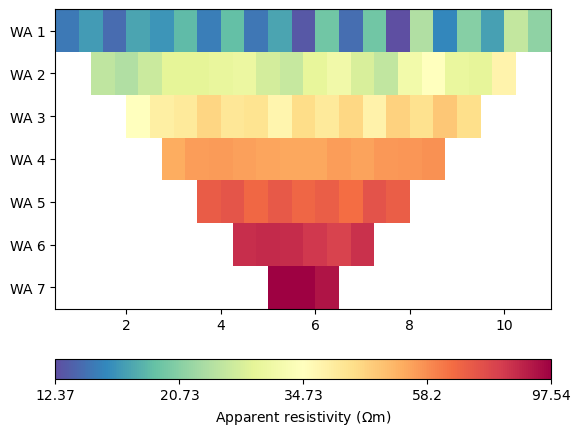

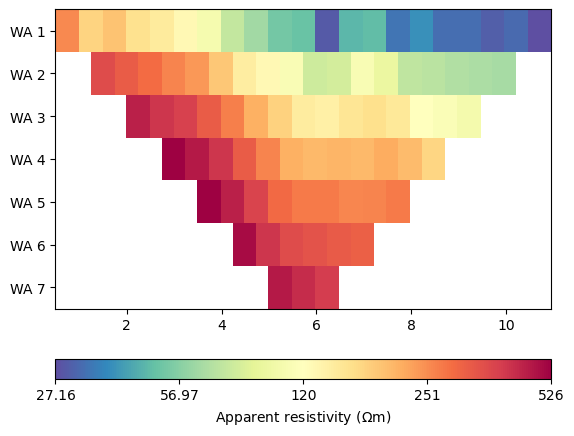

In [193]:
for item in parsons:
    ert.showData(item)
    

16/09/24 - 15:31:23 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:31:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


16/09/24 - 15:31:23 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:31:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/09/24 - 15:31:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/09/24 - 15:31:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/09/24 - 15:31:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2487 Cells: 4608 Boundaries: 3638
16/09/24 - 15:31:23 - pyGIMLi - INFO - Use median(data values)=817.4
16/09/24 - 15:31:23 - pyGIMLi - INFO - Created startmodel from forward operator: 892, min/max=817.400000/817.400000
16/09/24 - 15:31:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000028290712A70>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000282B839B7E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000028301B3F6F0>
min/max (data): 102/3203
min/max (error): 3%/3.01%
min/max (start model): 817/817
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  844.95
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   45.49 (dPhi = 94.40%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   22.81 (dPhi = 48.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.46 (dPhi = 81.10%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.25 (dPhi = 24.46%) lam: 20

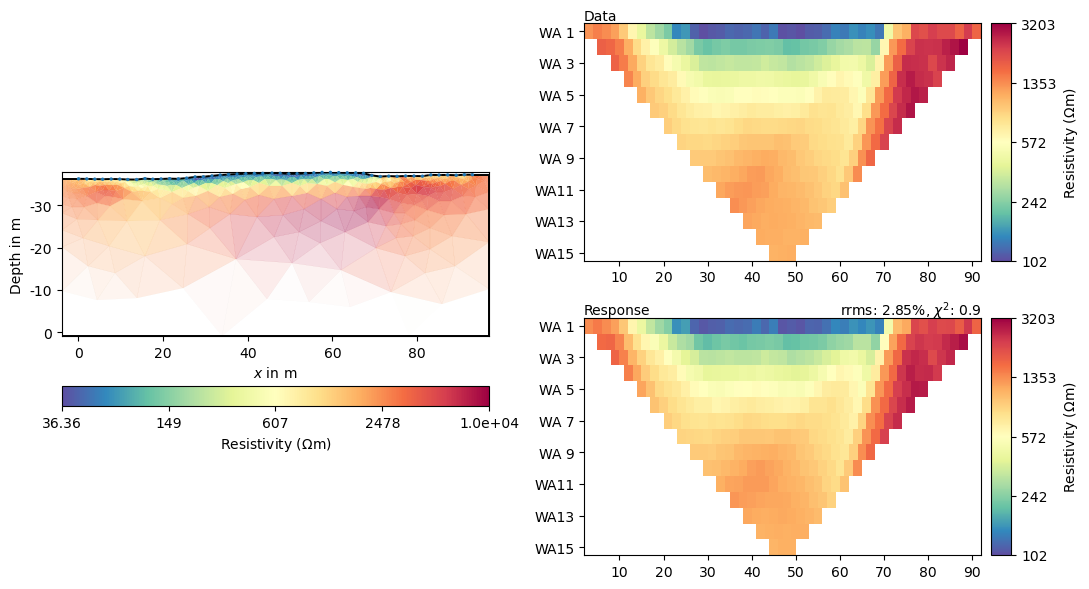

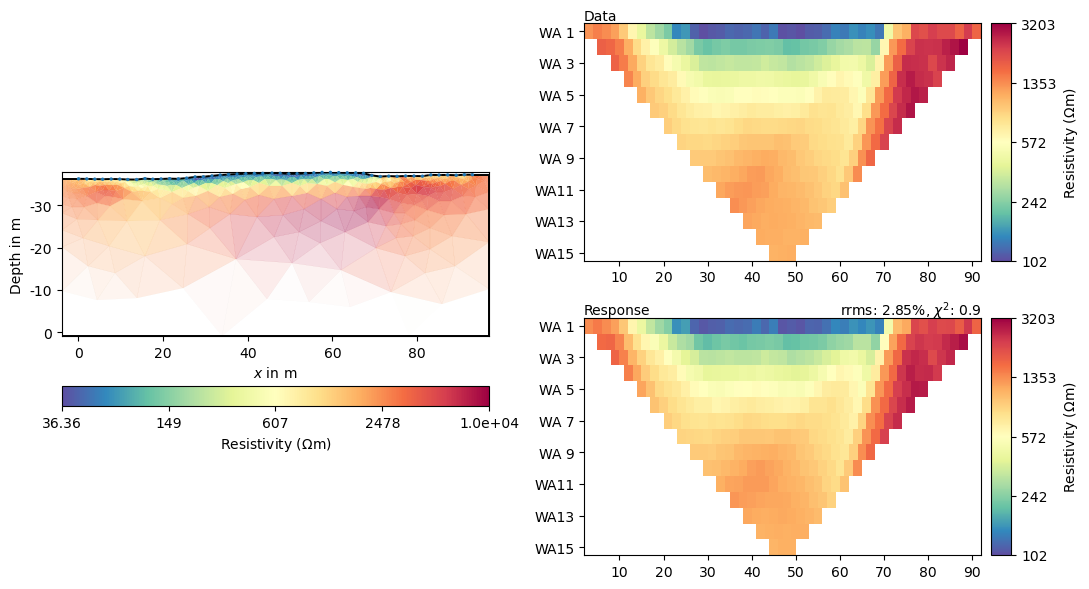

In [115]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

16/09/24 - 15:33:24 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_v1\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_v1\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_v1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

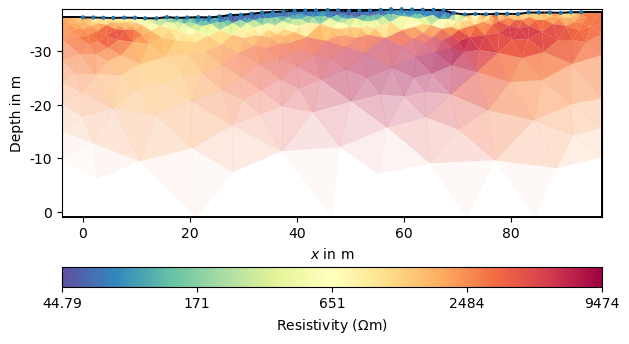

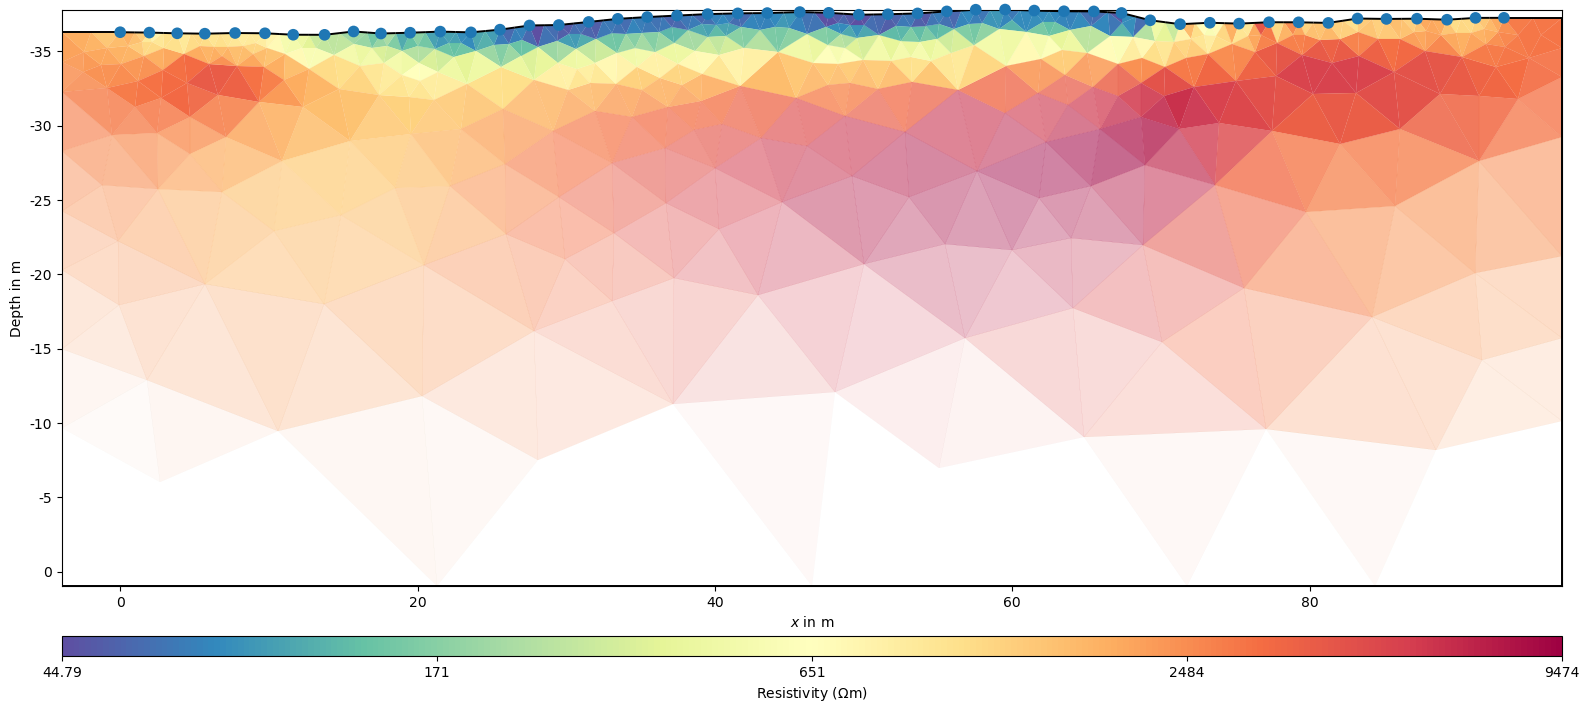

In [117]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_v1')

16/09/24 - 15:39:17 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:39:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/09/24 - 15:39:17 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:39:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


16/09/24 - 15:39:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/09/24 - 15:39:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/09/24 - 15:39:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2487 Cells: 4616 Boundaries: 3640
16/09/24 - 15:39:17 - pyGIMLi - INFO - Use median(data values)=653.549
16/09/24 - 15:39:17 - pyGIMLi - INFO - Created startmodel from forward operator: 934, min/max=653.549000/653.549000
16/09/24 - 15:39:17 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002831DD02CA0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002831F975E90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000282FECD0EB0>
min/max (data): 49.25/2167
min/max (error): 3%/3.01%
min/max (start model): 654/654
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1054.09
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   98.83 (dPhi = 90.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   62.18 (dPhi = 35.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.47 (dPhi = 86.54%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.50 (dPhi = 16.13%) lam: 

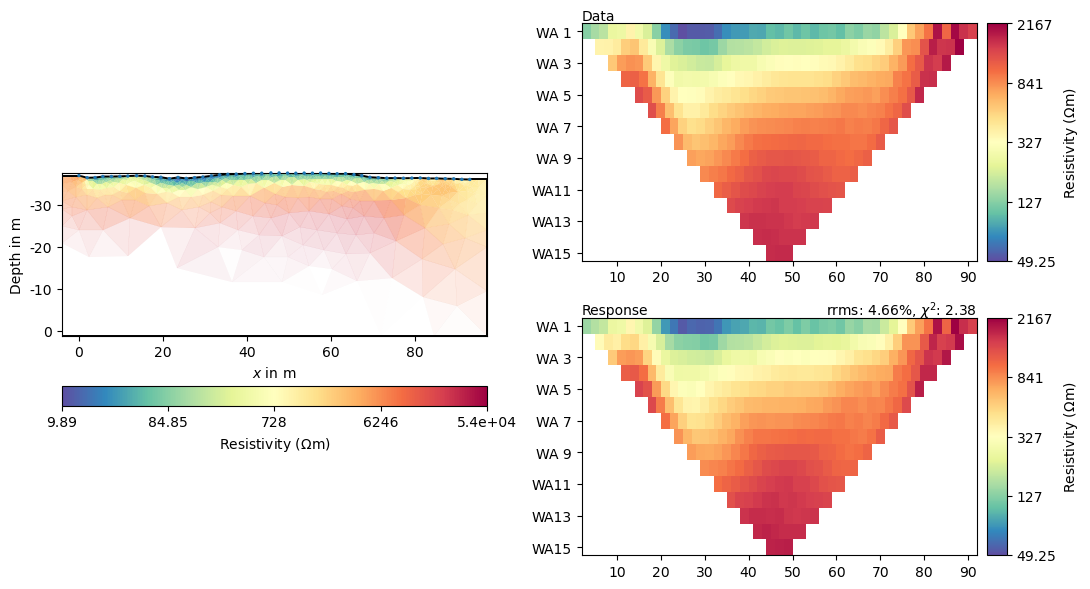

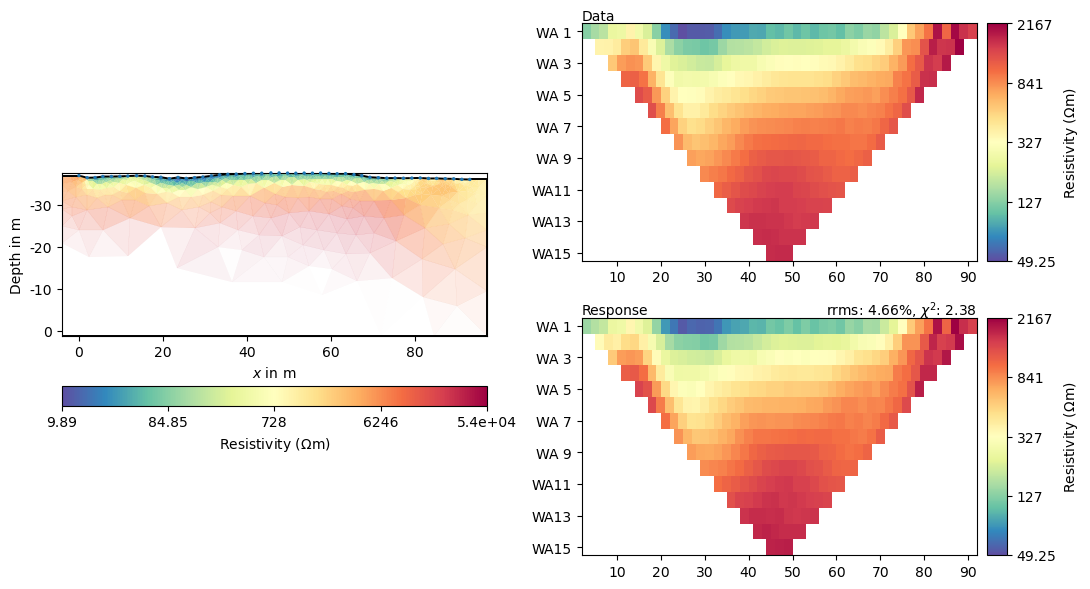

In [121]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

16/09/24 - 15:39:59 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

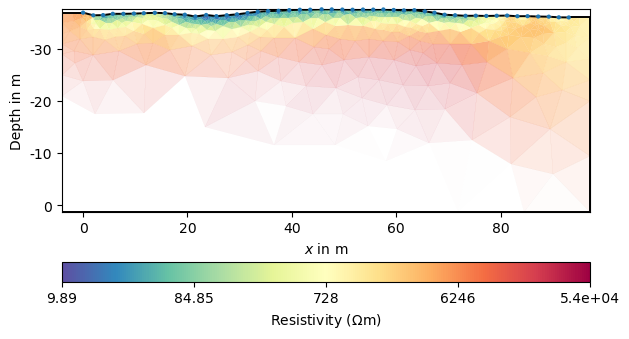

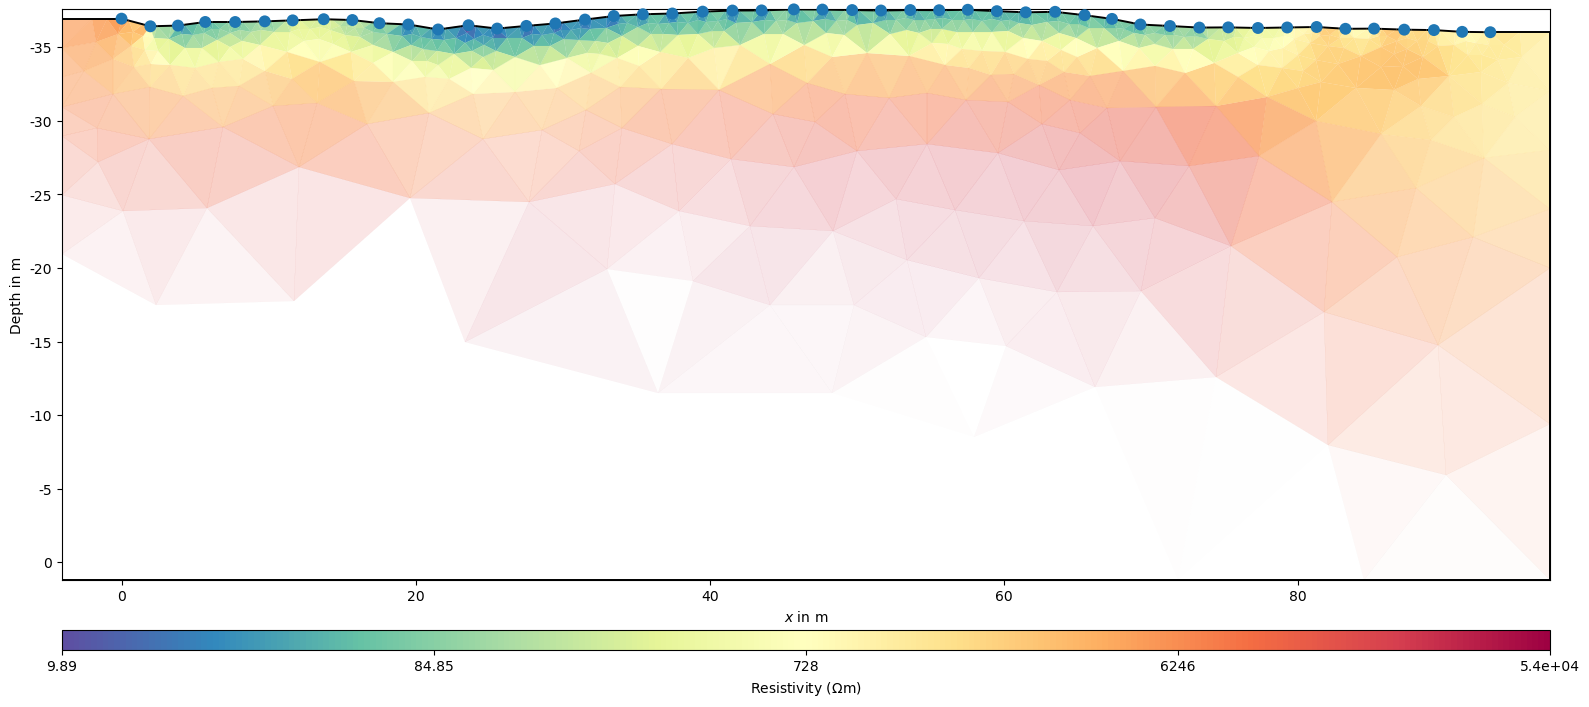

In [122]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_h1')

16/09/24 - 15:50:46 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:50:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/09/24 - 15:50:46 - pyGIMLi - INFO - Found 2 regions.
16/09/24 - 15:50:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/09/24 - 15:50:46 - pyGIMLi - INFO - Creating forward mesh from region infos.


16/09/24 - 15:50:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/09/24 - 15:50:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1429 Cells: 2656 Boundaries: 2092
16/09/24 - 15:50:46 - pyGIMLi - INFO - Use median(data values)=28.806
16/09/24 - 15:50:46 - pyGIMLi - INFO - Created startmodel from forward operator: 472, min/max=28.806000/28.806000
16/09/24 - 15:50:46 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000282AFF2CE50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000282AE0EE570>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000028301B3FED0>
min/max (data): 12.37/97.54
min/max (error): 3.01%/3.02%
min/max (start model): 28.81/28.81
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  404.86
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   22.66 (dPhi = 93.80%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.70 (dPhi = 76.74%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.63 (dPhi = 31.71%) lam: 20.0


################################################################################
#                  Abort criterion reache

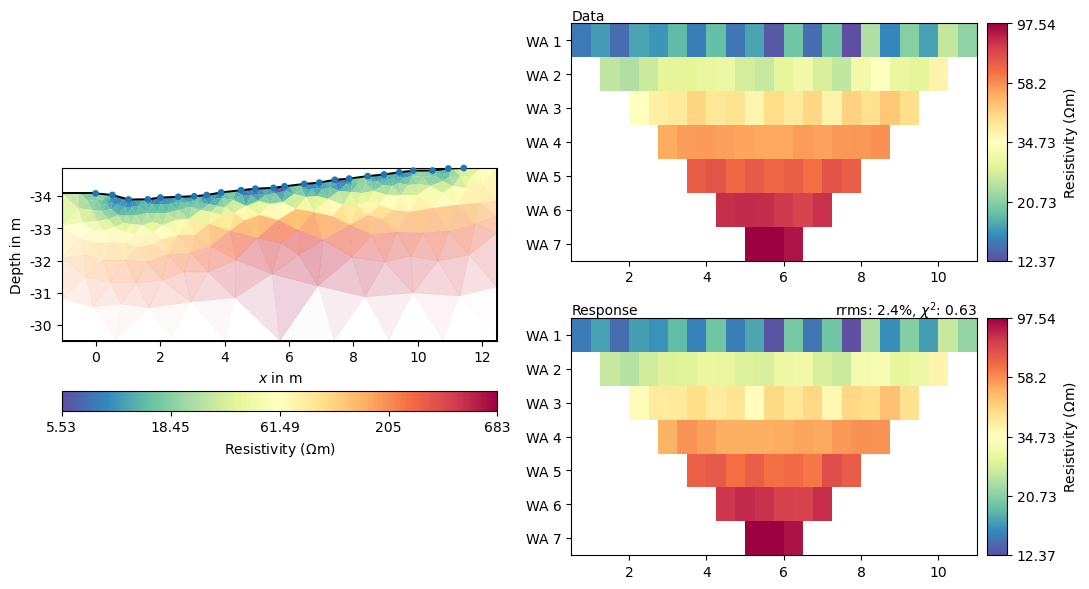

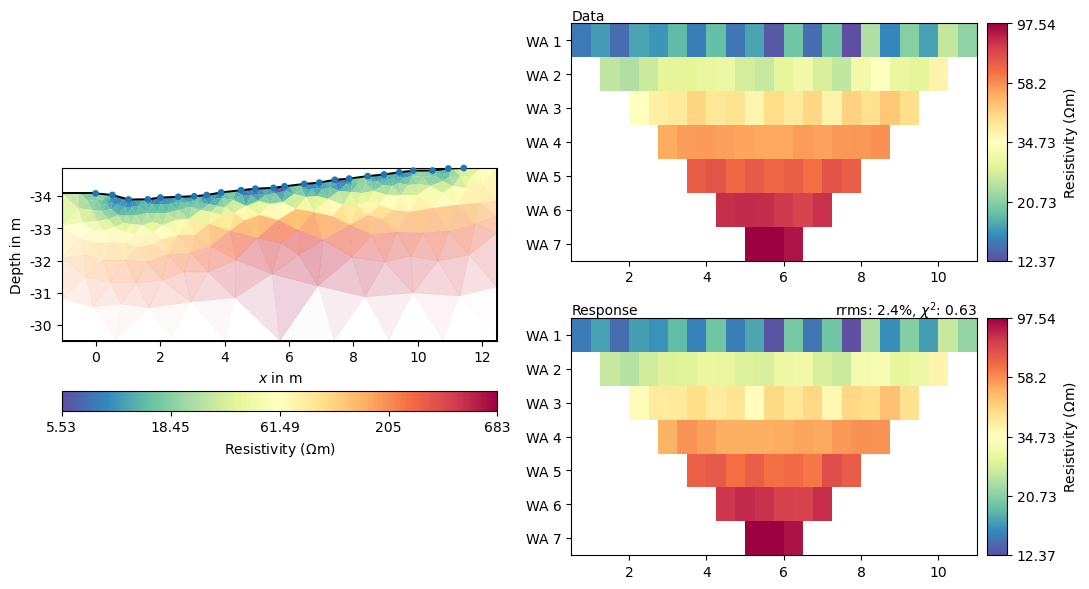

In [131]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

16/09/24 - 15:51:03 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1w\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1w\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

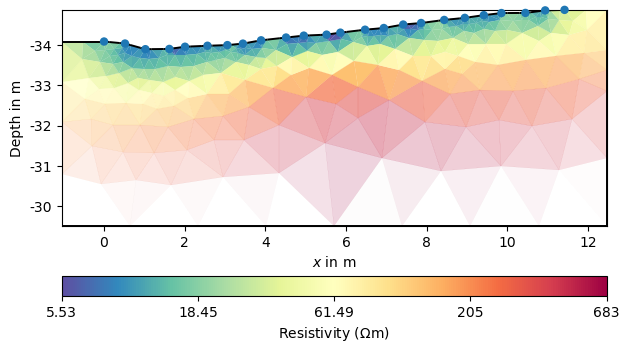

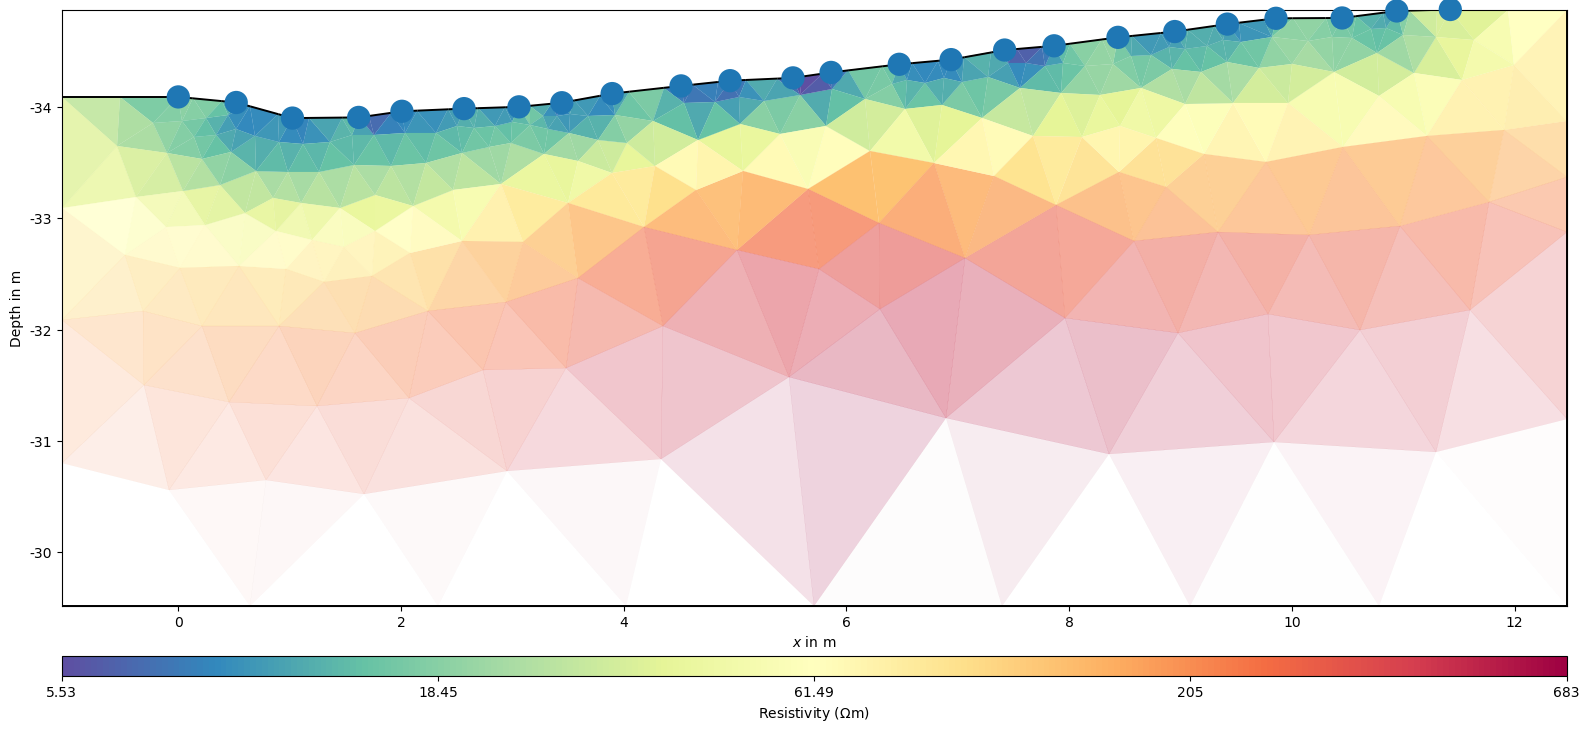

In [132]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_h1w')

17/09/24 - 08:35:05 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 08:35:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 08:35:05 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 08:35:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 08:35:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 08:35:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 08:35:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1334 Cells: 2452 Boundaries: 1946
17/09/24 - 08:35:06 - pyGIMLi - INFO - Use median(data values)=150.824
17/09/24 - 08:35:06 - pyGIMLi - INFO - Created startmodel from forward operator: 399, min/max=150.824000/150.824000
17/09/24 - 08:35:06 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000282AE17AA70>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002829FD01990>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000282AE078580>
min/max (data): 27.16/526
min/max (error): 3%/3.01%
min/max (start model): 151/151
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  878.86
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   52.17 (dPhi = 93.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   11.41 (dPhi = 68.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.82 (dPhi = 48.21%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.80 (dPhi = 1.28%) lam: 20

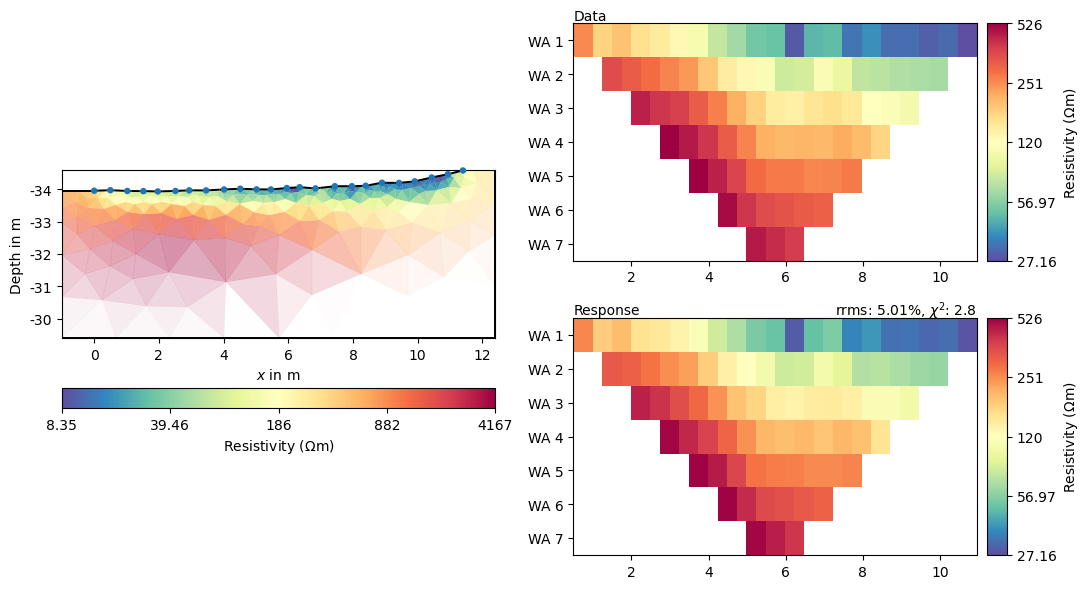

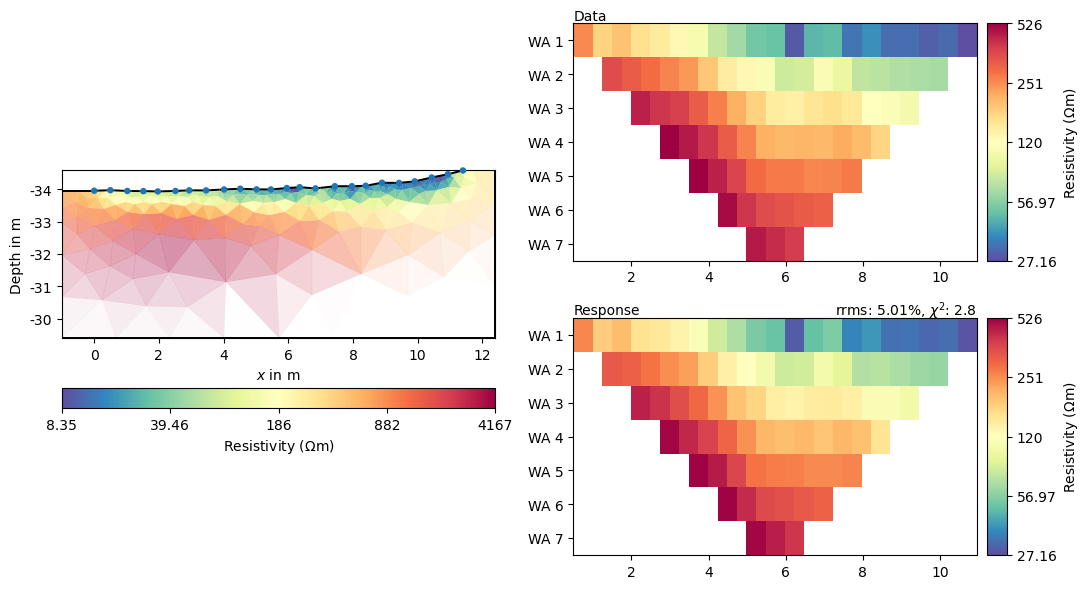

In [194]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[3], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

17/09/24 - 08:35:36 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1e\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1e\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_h1e\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

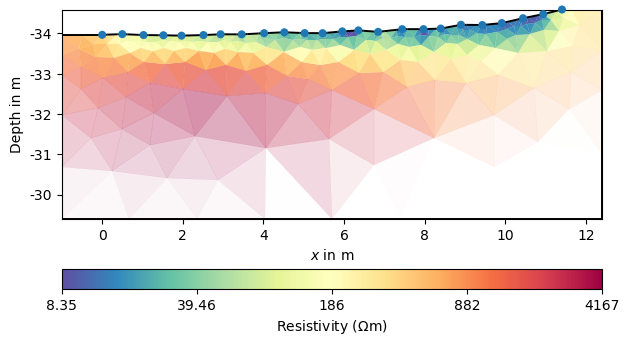

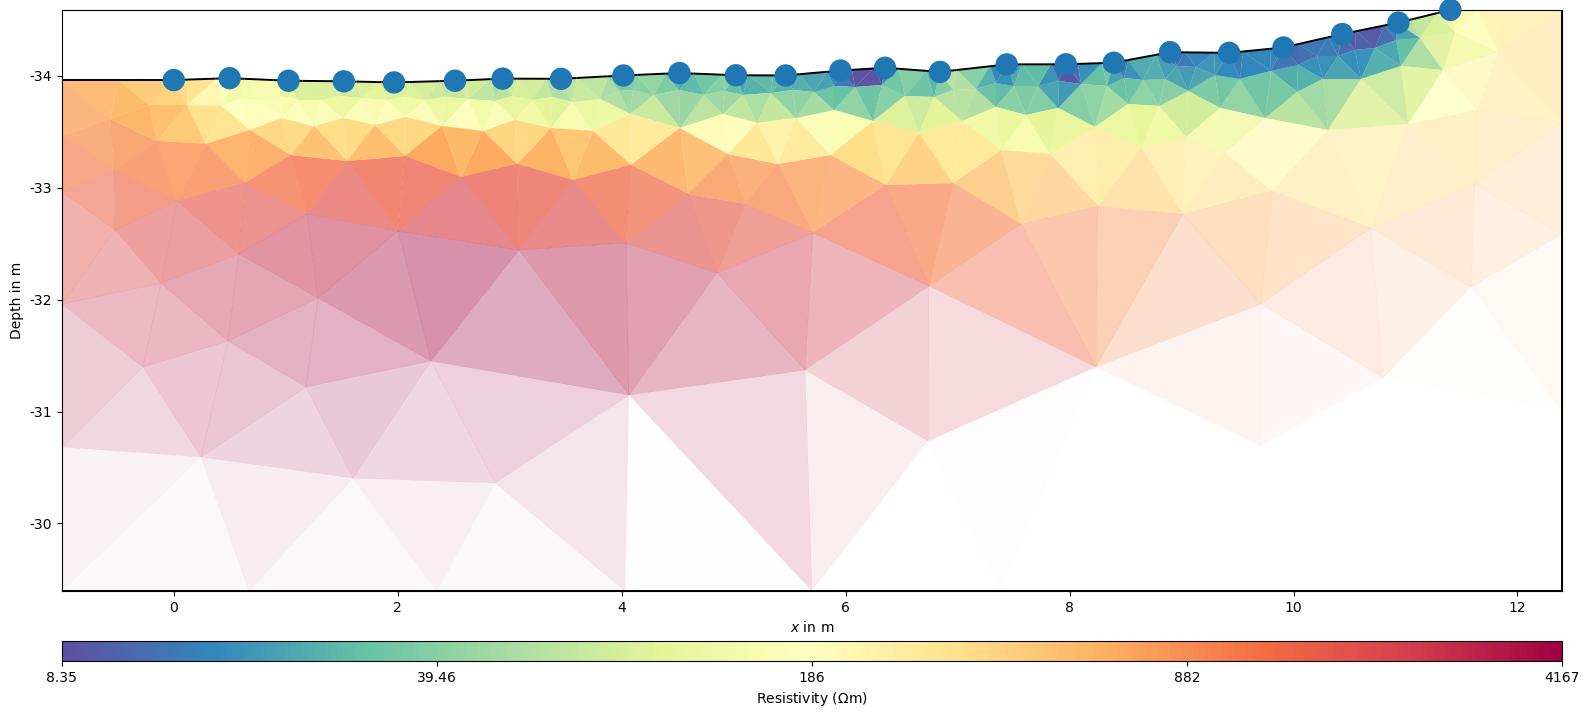

In [195]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_h1e')

In [198]:
mesh_v1 = pg.load(dir+'all_inversions/parsons_v1/ERTManager/resistivity-pd.bms')
res_v1 = pg.load(dir+'all_inversions/parsons_v1/ERTManager/resistivity.vector')
cov_v1 = pg.load(dir+'all_inversions/parsons_v1/ERTManager/resistivity-cov.vector')

mesh_h1 = pg.load(dir+'all_inversions/parsons_h1/ERTManager/resistivity-pd.bms')
res_h1 = pg.load(dir+'all_inversions/parsons_h1/ERTManager/resistivity.vector')
cov_h1 = pg.load(dir+'all_inversions/parsons_h1/ERTManager/resistivity-cov.vector')

mesh_h1w = pg.load(dir+'all_inversions/parsons_h1w/ERTManager/resistivity-pd.bms')
res_h1w = pg.load(dir+'all_inversions/parsons_h1w/ERTManager/resistivity.vector')
cov_h1w = pg.load(dir+'all_inversions/parsons_h1w/ERTManager/resistivity-cov.vector')

mesh_h1e = pg.load(dir+'all_inversions/parsons_h1e/ERTManager/resistivity-pd.bms')
res_h1e = pg.load(dir+'all_inversions/parsons_h1e/ERTManager/resistivity.vector')
cov_h1e = pg.load(dir+'all_inversions/parsons_h1e/ERTManager/resistivity-cov.vector')

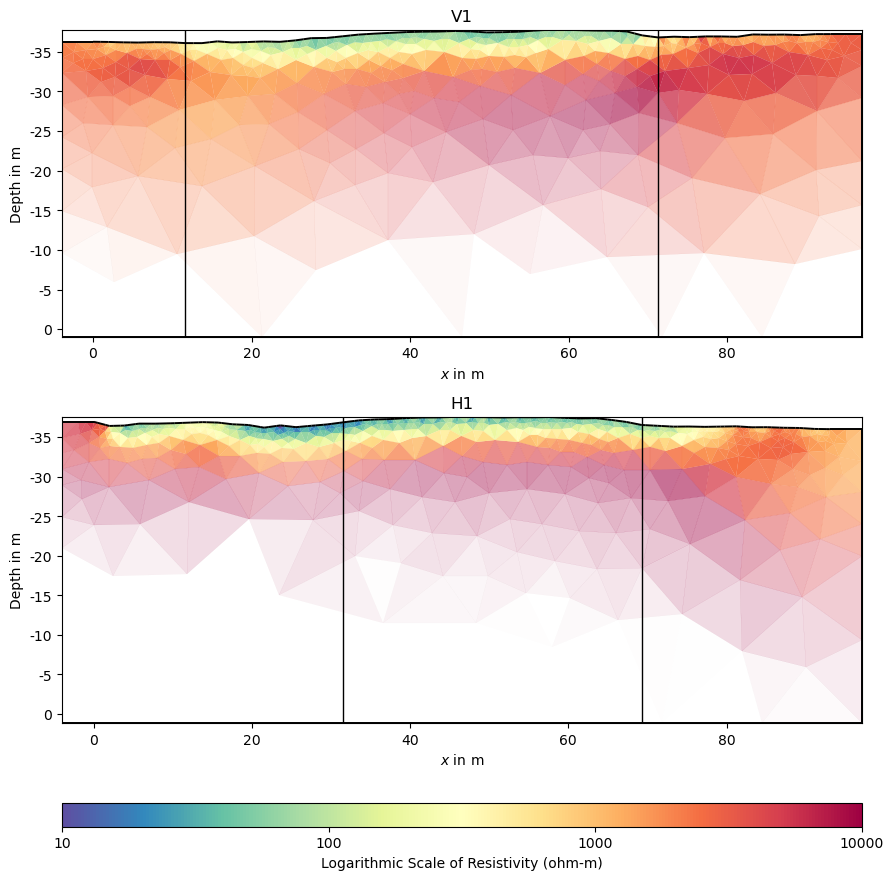

In [128]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(2, 1, figsize=(10, 12))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_v1, res_v1, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_v1, sharex=True)
pg.show(mesh_h1, res_h1, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_h1, sharex=True)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('V1')
ax[1].set_title('H1')

ax[0].axvline(11.6375341033965, linewidth=1, color='black')
ax[0].axvline(71.28832463, linewidth=1, color='black')
ax[1].axvline(31.51153605
, linewidth=1, color='black')
ax[1].axvline(69.27823145
, linewidth=1, color='black')




plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_2536\1482935927.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


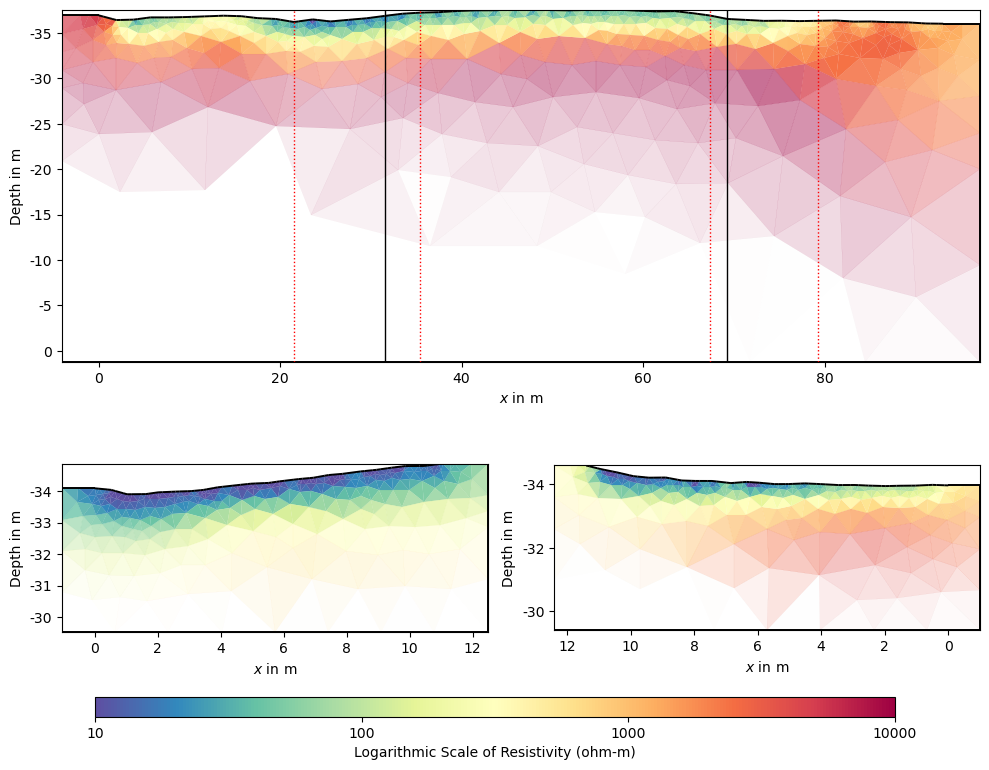

In [224]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a figure with 2 rows and 2 columns
fig = plt.figure(figsize=(10, 10))

# Define a GridSpec layout with 2 rows and 2 columns
gs = GridSpec(2, 2, figure=fig)

# First subplot spans both columns in the first row
ax1 = fig.add_subplot(gs[0, :])  # This spans both columns (0, :) means first row, all columns
pg.show(mesh_h1, res_h1, logScale=True, cMap="Spectral_r", ax=ax1,  cMin=10, cMax=10000,colorBar=False, coverage=cov_h1)
#ax1.set_title('Plot spanning two columns')
#ax1.set_ylim(0, 38)

# Second subplot is in the first column of the second row
ax2 = fig.add_subplot(gs[1, 0])  # Second row, first column
pg.show(mesh_h1w, res_h1w, logScale=True, cMap="Spectral_r", ax=ax2, cMin=10, cMax=10000,colorBar=False, coverage=cov_h1w)
#ax2.set_title('Plot 1 in second row, first column')
#ax2.set_ylim(30, 35)

# Third subplot is in the second column of the second row
ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column
pg.show(mesh_h1e, res_h1e, logScale=True, cMap="Spectral_r", ax=ax3, cMin=10, cMax=10000,colorBar=False, coverage=cov_h1e)
#ax3.set_title('Plot 2 in second row, second column')
ax3.invert_xaxis()
#ax3.set_ylim(30, 35)

ax1.axvline(21.52680882, linewidth=1, linestyle = ":", color='red')
ax1.axvline(35.44701602, linewidth=1, linestyle = ":", color='red')
#ax1.axhline(35, linewidth=1, color='black')
ax1.axvline(67.34610929, linewidth=1, linestyle = ":", color='red')
ax1.axvline(79.25851566, linewidth=1, linestyle = ":", color='red')

ax1.axvline(31.51153605, linewidth=1, color='black')
ax1.axvline(69.27823145, linewidth=1, color='black')


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
